In [1]:
import requests
import os

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)


def download_file_from_cloud_storage(id, destination):
    url = "https://docs.google.com/uc?export=download"

    session = requests.Session()
    
    params = { 'id': id, 'confirm': 1}
    response = session.get(url, params = params, stream = True)

    save_response_content(response, destination)


def save_response_content(response, destination):
    chunk_size = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(chunk_size):
            if chunk:
                f.write(chunk)

train_test_list = ['train.csv', 'test.csv']
files_id = ['1Xv3f0geTkQLLVKHVpxeDNsKDDaVhw-s_', '1TYU0P5l3h1dOtNfYbNpjdoB5z0tlAXeY']
destinations = [os.path.join(parent_dir, 'datasets', 'bacteria-species-prediction', i) for i in train_test_list]

for i, file_name in enumerate(train_test_list):
    print(f'Downloading {file_name} ...')
    download_file_from_cloud_storage(files_id[i], destinations[i])
    print(f'{file_name} downloaded!')

train.csv downloaded!
test.csv downloaded!


In [2]:
import pandas as pd

train = pd.read_csv(os.path.join(parent_dir, 'datasets', 'bacteria-species-prediction', 'train.csv'))
test = pd.read_csv(os.path.join(parent_dir, 'datasets', 'bacteria-species-prediction', 'test.csv'))

In [3]:
train

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica
199996,199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
199997,199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,...,0.000115,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae
199998,199998,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.001914,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Staphylococcus_aureus


In [4]:
test

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,-9.536743e-07,-0.000008,-4.291534e-05,-0.000108,-0.000194,-0.000234,-0.000195,-0.000110,-0.000043,...,0.000159,0.000559,0.000489,0.000499,0.000899,0.000443,0.000047,0.000148,0.000101,4.046326e-06
99996,299996,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
99997,299997,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
99998,299998,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [5]:
train.iloc[15,0:287]

row_id             15
A0T0G0C10   -0.000001
A0T0G1C9     -0.00001
A0T0G2C8    -0.000043
A0T0G3C7    -0.000114
               ...   
A8T2G0C0    -0.000043
A9T0G0C1     -0.00001
A9T0G1C0     -0.00001
A9T1G0C0     -0.00001
A10T0G0C0   -0.000001
Name: 15, Length: 287, dtype: object

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

train['target_num'] = le.fit_transform(train.target)
#test['target_num'] = le.fit_transform(test.target)

In [7]:
train.shape

(200000, 289)

In [8]:
test.shape

(100000, 287)

In [9]:
train

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_num
0,0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
1,1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6
2,2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6
3,3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6
4,4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,...,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica,6
199996,199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
199997,199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,...,0.000131,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae,8
199998,199998,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,0.001914,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Staphylococcus_aureus,7


In [10]:
import numpy as np

len(np.unique(train.A0T0G2C8))

139

In [11]:
from math import factorial

def bias(w, x, y, z):
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

def bias_of(s):
    w = int(s[1:s.index('T')])
    x = int(s[s.index('T')+1:s.index('G')])
    y = int(s[s.index('G')+1:s.index('C')])
    z = int(s[s.index('C')+1:])
    return bias(w, x, y, z)

In [12]:
elements = [e for e in train.columns if e != 'row_id' and e != 'target' and e != 'target_num']

train_int = pd.DataFrame({col: ((train[col] + bias_of(col)) * 1000000).round().astype(int)
                          for col in elements})
test_int = pd.DataFrame({col: ((test[col] + bias_of(col)) * 1000000).round().astype(int)
                         for col in elements})
train_int

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1000,0,1000,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
2,0,8,50,243,468,510,443,239,44,3,...,85,170,91,167,192,115,20,18,29,2
3,1,4,55,359,692,762,596,311,40,3,...,111,237,143,266,288,196,31,25,56,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,10,40,290,550,530,400,320,20,0,...,60,210,100,190,230,70,10,70,30,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0
199997,1,11,38,83,181,203,163,99,38,2,...,71,201,174,196,299,137,26,45,31,1
199998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2000,0,0,0,0,0,0


In [13]:
train['gcd'] = np.gcd.reduce(train_int[elements], axis=1)
test['gcd'] = np.gcd.reduce(test_int[elements], axis=1)

In [14]:
train

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_num,gcd
0,0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9,10000
1,1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6,1000
2,2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6,1
3,3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6,1
4,4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,...,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica,6,10
199996,199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9,1000
199997,199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,...,0.000110,0.000213,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae,8,1
199998,199998,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,0.001914,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Staphylococcus_aureus,7,1000


In [15]:
max(train_int.iloc[0,])

40000

In [16]:
elements.append('gcd')

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=1000, random_state=42)
clf.fit(train[elements],train['target_num'])

ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [18]:
predictions=le.inverse_transform(clf.predict(test[elements]))
predictions

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Enterococcus_hirae', ..., 'Bacteroides_fragilis',
       'Bacteroides_fragilis', 'Streptococcus_pyogenes'], dtype=object)

In [19]:
train.loc[:, train.columns != 'row_id'].duplicated().sum()

76007

In [20]:
test.loc[:, test.columns != 'row_id'].duplicated().sum()

26779

In [21]:
test

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,gcd
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08,1
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1000
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08,1
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07,1
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,-9.536743e-07,-0.000008,-4.291534e-05,-0.000108,-0.000194,-0.000234,-0.000195,-0.000110,-0.000043,...,0.000559,0.000489,0.000499,0.000899,0.000443,0.000047,0.000148,0.000101,4.046326e-06,1
99996,299996,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,10000
99997,299997,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1000
99998,299998,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,10000


In [ ]:
# pd.concat([test['row_id'], pd.Series(predictions, name='target')], axis=1).to_csv('submission1.csv',index=False)

In [22]:
train_int.loc[train['target']=='Streptococcus_pyogenes'].tail()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
199967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199968,0,20,50,110,170,260,150,130,0,0,...,120,330,170,340,380,120,20,70,20,0
199971,0,20,20,90,110,200,80,60,0,0,...,260,550,260,470,430,300,50,70,50,0
199976,0,10,20,60,90,140,50,60,0,0,...,210,550,470,430,710,360,100,90,50,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,1000,0,0,0,0,0


In [23]:
test_int

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,0,8,42,138,234,238,221,138,34,2,...,82,171,98,194,176,102,20,16,37,1
1,0,0,0,0,2000,0,2000,0,1000,0,...,0,1000,0,0,0,0,0,0,0,0
2,1,13,43,100,207,235,196,117,47,2,...,84,188,127,197,203,113,30,40,31,1
3,0,2,51,330,620,754,652,301,38,2,...,112,244,141,261,303,193,28,26,61,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1000,0,0,0,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,2,0,6,6,6,5,4,0,0,...,202,645,532,585,985,486,57,158,111,5
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1000,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
clf0 = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf0.fit(train[elements],train['target_num'])
predictions0=le.inverse_transform(clf0.predict(test[elements]))
predictions0

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Enterococcus_hirae', ..., 'Bacteroides_fragilis',
       'Bacteroides_fragilis', 'Streptococcus_pyogenes'], dtype=object)

In [25]:
(predictions!=predictions0).sum()

3675

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf3 = ExtraTreesClassifier(n_estimators=5000, random_state=42)
clf3.fit(train[elements],train['target_num'])

In [ ]:
predictions3=le.inverse_transform(clf3.predict(test[elements]))
predictions3

In [ ]:
predictions2 = pd.read_csv('submission2.csv')
predictions2

In [ ]:
(np.array(predictions2['target'])!=predictions3).sum()

In [ ]:
pd.concat([test['row_id'], pd.Series(predictions3, name='target')], axis=1).to_csv('submission3.csv',index=False)

In [34]:
train=train.iloc[:,train.columns!='row_id']

In [37]:
train=train.drop_duplicates()

In [38]:
len(train)

123993

In [227]:
from sklearn.model_selection import train_test_split
X = train[elements]
y = train['target_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30,activation='tanh',input_shape=X_train.shape[1:]))
model.add(Dense(1, activation='sigmoid'))

In [230]:
from keras import metrics
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=[metrics.mae])
model.fit(X_train,np.array(y_train),epochs=4,batch_size=1)

Epoch 1/4
10112/37197 [=======>......................] - ETA: 19s - loss: -1597.7612 - mean_absolute_error: 3.8091

KeyboardInterrupt: 

In [56]:
X_train

array([[-0.01848729,  0.17706555, -0.06297566, ..., -0.15068083,
        -0.08871001, -0.41218656],
       [-0.01848729, -0.04212832, -0.06297566, ..., -0.06629769,
         0.30728337, -0.41496226],
       [-0.01848729,  0.04006938,  0.10385977, ..., -0.08739347,
        -0.08871001, -0.41218656],
       ...,
       [-0.01848729, -0.09692678, -0.17419928, ..., -0.23506398,
        -0.08871001,  2.66884717],
       [-0.01848729,  0.04006938, -0.06297566, ..., -0.08739347,
        -0.08871001, -0.41218656],
       [-0.01848729, -0.04212832,  0.05380914, ..., -0.1633383 ,
        -0.02271112, -0.41496226]])

In [58]:
np.array(y_train)

array([0, 8, 3, ..., 3, 9, 4])

In [66]:
np.array(y_train)

array([0, 8, 3, ..., 3, 9, 4])

In [450]:
from sklearn.model_selection import train_test_split
train_with_gcd = train[train['gcd']==1000]
X = train_with_gcd[elements]
y = train_with_gcd['target_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [451]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [452]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [453]:
model.layers

In [454]:
# keras.utils.plot_model(model, 'neural_net_model.png',show_shapes=True)

In [455]:
model.layers[0].name

'dense'

In [456]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [457]:
history = model.fit(X_train, y_train, epochs=22,validation_data=(X_test, y_test))

Epoch 1/22
331/331 [==============================] - 1s 3ms/step - loss: 1.5969 - accuracy: 0.3982 - val_loss: 1.0170 - val_accuracy: 0.6563
Epoch 2/22
331/331 [==============================] - 1s 2ms/step - loss: 0.9603 - accuracy: 0.6252 - val_loss: 0.6987 - val_accuracy: 0.7786
Epoch 3/22
331/331 [==============================] - 1s 2ms/step - loss: 0.7328 - accuracy: 0.7119 - val_loss: 0.5545 - val_accuracy: 0.8249
Epoch 4/22
331/331 [==============================] - 1s 2ms/step - loss: 0.6021 - accuracy: 0.7643 - val_loss: 0.4692 - val_accuracy: 0.8419
Epoch 5/22
331/331 [==============================] - 1s 3ms/step - loss: 0.5422 - accuracy: 0.7881 - val_loss: 0.4259 - val_accuracy: 0.8472
Epoch 6/22
331/331 [==============================] - 1s 3ms/step - loss: 0.4917 - accuracy: 0.8040 - val_loss: 0.3937 - val_accuracy: 0.8607
Epoch 7/22
331/331 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.8238 - val_loss: 0.3666 - val_accuracy: 0.8629
Epoch 

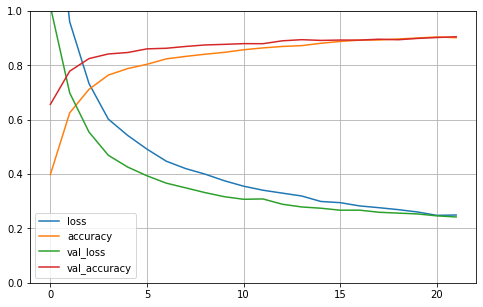

In [458]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [240]:
new_data=scaler.transform(test[elements])
y_new_data=model.predict(new_data)
y_new_data.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.17, 0.05, 0.06, ..., 0.13, 0.31, 0.25],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]], dtype=float32)

In [241]:
y_pred = np.argmax(model.predict(new_data),axis=-1)
y_pred

array([4, 6, 2, ..., 8, 0, 9], dtype=int64)

In [242]:
y_text_preds=le.inverse_transform(y_pred)
y_text_preds

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Enterococcus_hirae', ..., 'Streptococcus_pneumoniae',
       'Bacteroides_fragilis', 'Streptococcus_pyogenes'], dtype=object)

In [243]:
pd.concat([test['row_id'], pd.Series(y_text_preds, name='target')], axis=1).to_csv('submission5.csv',index=False)

In [247]:
y_max_prob = [max(i) for i in y_new_data]
y_max_prob

[0.9998142,
 0.99987113,
 0.9938653,
 1.0,
 0.9999937,
 0.99999917,
 0.9675319,
 1.0,
 0.9999634,
 0.957837,
 0.99996924,
 0.9907245,
 0.24344279,
 0.70134073,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9998559,
 0.99503326,
 0.99917245,
 0.8537127,
 0.58775955,
 0.99684876,
 0.99994254,
 0.6028453,
 1.0,
 0.973558,
 0.91229546,
 0.47035742,
 1.0,
 0.999987,
 0.4068027,
 1.0,
 0.5024999,
 0.9984456,
 0.9999969,
 0.9823208,
 0.7020222,
 0.98643667,
 0.9669864,
 1.0,
 0.99619126,
 1.0,
 1.0,
 0.8785075,
 0.9999989,
 1.0,
 1.0,
 1.0,
 0.5674872,
 0.99999905,
 0.7688854,
 1.0,
 0.99956113,
 1.0,
 0.99719137,
 0.32584035,
 0.99991715,
 0.7076448,
 0.99999,
 0.9999844,
 0.7760245,
 1.0,
 1.0,
 0.99999964,
 1.0,
 0.6837897,
 0.999972,
 0.98353726,
 0.99999917,
 0.9999994,
 0.9894711,
 0.97640765,
 0.9999995,
 0.9999927,
 0.9999999,
 0.6695095,
 1.0,
 0.25361335,
 0.8906874,
 0.9998386,
 0.99419504,
 0.39043063,
 0.93893325,
 0.73628724,
 0.9999999,
 0.99939847,
 0.6503731,
 0.9999844,
 0.99999964,
 0.749993,

In [251]:
predictions3 = pd.read_csv('submission3.csv')
predictions3['target'][1]

'Salmonella_enterica'

In [266]:
true_pred_class=np.array([])
true_pred_class

array([], dtype=float64)

In [267]:
for i in range(len(predictions3)):
    if y_max_prob[i] > 0.98:
        true_pred_class = np.append(true_pred_class, y_text_preds[i])
    else:
        true_pred_class = np.append(true_pred_class, predictions3['target'][i])

In [269]:
pd.concat([test['row_id'], pd.Series(true_pred_class, name='target')], axis=1).to_csv('submission5.csv',index=False)

In [271]:
max(y_new_data[12])

0.24344279

In [275]:
(true_pred_class!=y_text_preds).sum()

9817

In [278]:
train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_num,gcd
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9,10000
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6,1000
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6,1
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6,1
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199989,-9.536743e-07,1.046326e-05,0.000057,0.000006,0.000080,0.000260,0.000140,0.000096,-0.000033,-0.000010,...,0.000044,0.000014,-0.000033,-9.536743e-06,0.000010,-0.000010,-9.536743e-07,Klebsiella_pneumoniae,5,10
199990,-9.536743e-07,-4.536743e-06,0.000002,0.000042,0.000066,0.000018,0.000057,0.000031,-0.000002,-0.000007,...,0.000120,0.000133,0.000088,1.146326e-05,0.000010,0.000027,4.632568e-08,Escherichia_coli,3,1
199991,-9.536743e-07,-4.536743e-06,-0.000019,-0.000053,-0.000092,-0.000129,-0.000099,-0.000045,-0.000026,-0.000009,...,0.000310,0.000545,0.000244,5.546326e-05,0.000073,0.000075,4.632568e-08,Bacteroides_fragilis,0,1
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-0.000010,...,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica,6,10


In [286]:
elements=elements[:-1]

In [287]:
elements

['A0T0G0C10',
 'A0T0G1C9',
 'A0T0G2C8',
 'A0T0G3C7',
 'A0T0G4C6',
 'A0T0G5C5',
 'A0T0G6C4',
 'A0T0G7C3',
 'A0T0G8C2',
 'A0T0G9C1',
 'A0T0G10C0',
 'A0T1G0C9',
 'A0T1G1C8',
 'A0T1G2C7',
 'A0T1G3C6',
 'A0T1G4C5',
 'A0T1G5C4',
 'A0T1G6C3',
 'A0T1G7C2',
 'A0T1G8C1',
 'A0T1G9C0',
 'A0T2G0C8',
 'A0T2G1C7',
 'A0T2G2C6',
 'A0T2G3C5',
 'A0T2G4C4',
 'A0T2G5C3',
 'A0T2G6C2',
 'A0T2G7C1',
 'A0T2G8C0',
 'A0T3G0C7',
 'A0T3G1C6',
 'A0T3G2C5',
 'A0T3G3C4',
 'A0T3G4C3',
 'A0T3G5C2',
 'A0T3G6C1',
 'A0T3G7C0',
 'A0T4G0C6',
 'A0T4G1C5',
 'A0T4G2C4',
 'A0T4G3C3',
 'A0T4G4C2',
 'A0T4G5C1',
 'A0T4G6C0',
 'A0T5G0C5',
 'A0T5G1C4',
 'A0T5G2C3',
 'A0T5G3C2',
 'A0T5G4C1',
 'A0T5G5C0',
 'A0T6G0C4',
 'A0T6G1C3',
 'A0T6G2C2',
 'A0T6G3C1',
 'A0T6G4C0',
 'A0T7G0C3',
 'A0T7G1C2',
 'A0T7G2C1',
 'A0T7G3C0',
 'A0T8G0C2',
 'A0T8G1C1',
 'A0T8G2C0',
 'A0T9G0C1',
 'A0T9G1C0',
 'A0T10G0C0',
 'A1T0G0C9',
 'A1T0G1C8',
 'A1T0G2C7',
 'A1T0G3C6',
 'A1T0G4C5',
 'A1T0G5C4',
 'A1T0G6C3',
 'A1T0G7C2',
 'A1T0G8C1',
 'A1T0G9C0',
 'A1T1G0C

In [459]:
test_gcd=test[test['gcd']==1000]
test_gcd

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,gcd
1,200001,-9.536743e-07,-0.00001,-0.000043,-0.000114,0.0018,-0.00024,0.0018,-0.000114,0.000957,...,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-0.00001,-0.00001,-9.536743e-07,1000
4,200004,-9.536743e-07,-0.00001,-0.000043,-0.000114,-0.0002,-0.00024,-0.0002,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.00001,-0.00001,0.00099,-9.536743e-07,1000
6,200006,-9.536743e-07,-0.00001,-0.000043,-0.000114,0.0018,0.00076,-0.0002,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.00001,0.00099,-0.00001,-9.536743e-07,1000
7,200007,-9.536743e-07,-0.00001,-0.000043,-0.000114,-0.0002,-0.00024,-0.0002,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,0.001914,-0.000043,-0.00001,-0.00001,0.00099,-9.536743e-07,1000
8,200008,-9.536743e-07,-0.00001,-0.000043,-0.000114,-0.0002,-0.00024,-0.0002,-0.000114,-0.000043,...,-0.000086,0.000957,0.000914,-0.000086,-0.000043,0.00099,-0.00001,-0.00001,-9.536743e-07,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,299985,-9.536743e-07,-0.00001,-0.000043,0.000886,0.0018,-0.00024,-0.0002,-0.000114,-0.000043,...,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-0.00001,-0.00001,-9.536743e-07,1000
99986,299986,-9.536743e-07,-0.00001,-0.000043,-0.000114,-0.0002,0.00076,-0.0002,-0.000114,-0.000043,...,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-0.00001,-0.00001,-9.536743e-07,1000
99987,299987,-9.536743e-07,-0.00001,-0.000043,-0.000114,-0.0002,-0.00024,-0.0002,-0.000114,-0.000043,...,0.000914,-0.000043,-0.000086,-0.000086,0.000957,-0.00001,0.00099,-0.00001,-9.536743e-07,1000
99989,299989,-9.536743e-07,-0.00001,-0.000043,-0.000114,-0.0002,-0.00024,-0.0002,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,0.003957,-0.00001,-0.00001,-0.00001,-9.536743e-07,1000


In [460]:
neural=pd.concat([test_gcd['row_id'].reset_index()['row_id'], pd.Series(le.inverse_transform(np.argmax(model.predict(scaler.transform(test_gcd[elements])),axis=-1)), name='neural_target')], axis=1, ignore_index=True)
neural

,0,1
0,200001,Salmonella_enterica
1,200004,Staphylococcus_aureus
2,200006,Salmonella_enterica
3,200007,Staphylococcus_aureus
4,200008,Streptococcus_pneumoniae
...,...,...
24925,299985,Klebsiella_pneumoniae
24926,299986,Escherichia_fergusonii
24927,299987,Streptococcus_pyogenes
24928,299989,Campylobacter_jejuni


In [461]:
predictions3 = pd.read_csv('submission3.csv')
predictions3

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


In [462]:
y_max_prob = [max(i) for i in model.predict(scaler.transform(test_gcd[elements]))]
y_max_prob

[0.9833627,
 0.99999523,
 0.73099834,
 0.99999404,
 0.97726816,
 0.76920795,
 1.0,
 0.982531,
 0.65770596,
 0.70239717,
 0.99998415,
 0.52222896,
 0.30142736,
 0.86734164,
 0.9558761,
 0.40439487,
 0.999678,
 0.8379358,
 0.54719543,
 0.9504097,
 0.3539078,
 0.7769265,
 0.5648817,
 0.7071531,
 0.99953353,
 0.97904015,
 0.96935576,
 0.9999087,
 0.9999976,
 0.9999734,
 0.9995559,
 0.80140144,
 0.99999845,
 0.5398567,
 0.89607674,
 0.9999567,
 0.99230194,
 0.99965835,
 0.99993086,
 0.93596125,
 0.5758955,
 0.9717686,
 0.9780437,
 0.9999721,
 1.0,
 0.9994568,
 0.84593815,
 0.86953396,
 0.80862874,
 0.9494012,
 0.9995926,
 0.9137988,
 1.0,
 0.9690646,
 0.98725873,
 0.56800056,
 0.9980101,
 0.9999187,
 0.5407221,
 0.9742809,
 0.9398525,
 0.6081749,
 0.77843237,
 0.99970585,
 0.996579,
 0.99988735,
 0.9998505,
 0.5192567,
 0.9999995,
 0.9989254,
 0.545231,
 0.6892768,
 0.6175817,
 0.9766639,
 0.9991165,
 0.9999999,
 0.9705761,
 0.7807413,
 0.97114706,
 0.9664233,
 0.7167067,
 0.76843363,
 0.99

In [463]:
len(y_max_prob)

24930

In [469]:
true_labels=np.array([])
counter = 0
for i in range(len(predictions3)):
    if predictions3['row_id'][i] in np.array(neural[0]):
        if y_max_prob[counter] > 0.98:
            true_labels = np.append(true_labels, neural[1][counter])
        else:
            true_labels = np.append(true_labels, predictions3['target'][i])
        counter = counter + 1
    else:
        true_labels = np.append(true_labels, predictions3['target'][i])

In [423]:
predictions3['target'][3]

'Salmonella_enterica'

In [424]:
neural[1][0]

'Bacteroides_fragilis'

In [470]:
preds4=pd.read_csv('submission3.csv')
preds4

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


In [474]:
(np.array(preds4['target'])!=true_labels).sum()

67

In [473]:
len(true_labels)

100000

In [472]:
pd.concat([test['row_id'], pd.Series(true_labels, name='target')], axis=1).to_csv('submission8.csv',index=False)